# Metodologie

In [150]:
library(dplyr)
library(readxl)
library(MASS)


Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select



In [102]:
data_pred <- read_excel("pred.xlsx")
data_po <- read_excel("po.xlsx")

data_pred <- data_pred %>%
    mutate(`dynamometr plantární flexe P` = (`dynamometr plantární flexe (M. triceps surae) 1 P` + 
           `dynamometr plantární flexe (M. triceps surae) 2 P` + `dynamometr plantární flexe (M. triceps surae) 3 P`)/3) %>%
    mutate(`dynamometr plantární flexe L` = (`dynamometr plantární flexe (M. triceps surae) 1 L` + 
           `dynamometr plantární flexe (M. triceps surae) 2 L` + `dynamometr plantární flexe (M. riceps surae) 3 L`)/3) %>%
    mutate(`dynamometr dorsální flexe P` = (`dynamometr dorsální flexe (M. tibialis anterior) 1 P` + 
           `dynamometr dorsální flexe (M. tibialis anterior) 2 P`+`dynamometr dorsální flexe (M. tibialis anterior) 3 P`)/3) %>%
    mutate(`dynamometr dorsální flexe L` = (`dynamometr dorsální flexe (M. tibialis anterior) 1 L` + 
           `dynamometr dorsální flexe (M. tibialis anterior) 2 L`+`dynamometr dorsální flexe (M. tibialis anterior) 3 L`)/3)

data_po <- data_po %>%
    mutate(`dynamometr plantární flexe P` = (`dynamometr plantární flexe (M. triceps surae) 1 P` + 
           `dynamometr plantární flexe (M. triceps surae) 2 P` + `dynamometr plantární flexe (M. triceps surae) 3 P`)/3) %>%
    mutate(`dynamometr plantární flexe L` = (`dynamometr plantární flexe (M. triceps surae) 1 L` + 
           `dynamometr plantární flexe (M. triceps surae) 2 L` + `dynamometr plantární flexe (M. riceps surae) 3 L`)/3) %>%
    mutate(`dynamometr dorsální flexe P` = (`dynamometr dorsální flexe (M. tibialis anterior) 1 P` + 
           `dynamometr dorsální flexe (M. tibialis anterior) 2 P`+`dynamometr dorsální flexe (M. tibialis anterior) 3 P`)/3) %>%
    mutate(`dynamometr dorsální flexe L` = (`dynamometr dorsální flexe (M. tibialis anterior) 1 L` + 
           `dynamometr dorsální flexe (M. tibialis anterior) 2 L`+`dynamometr dorsální flexe (M. tibialis anterior) 3 L`)/3)

data_pred <- data_pred[, c((ncol(data_pred)-9):ncol(data_pred))]
data_po <- data_po[, c((ncol(data_po)-9):ncol(data_po))]

cols <- data_pred %>% colnames()
data_pred[cols] <- lapply(data_pred[cols], as.numeric)

cols <- data_po %>% colnames()
data_po[cols] <- lapply(data_po[cols], as.numeric)

data_pred <- as.data.frame(data_pred)
data_po <- as.data.frame(data_po)

# T-testy

In [103]:
for (i in 1:ncol(data_po)){
    test <- t.test(data_pred[,i], data_po[,i], paired = TRUE, alternative = "two.sided")
    #print(c(test$p.value,i, colnames(data_pred)[i]))
    print(test)
}


	Paired t-test

data:  data_pred[, i] and data_po[, i]
t = -0.59614, df = 19, p-value = 0.5581
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.834322  2.134322
sample estimates:
mean of the differences 
                  -0.85 


	Paired t-test

data:  data_pred[, i] and data_po[, i]
t = -1.6835, df = 19, p-value = 0.1086
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.1405845  0.3405845
sample estimates:
mean of the differences 
                   -1.4 


	Paired t-test

data:  data_pred[, i] and data_po[, i]
t = -1.0526, df = 19, p-value = 0.3057
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.6895694  0.8895694
sample estimates:
mean of the differences 
                   -0.9 


	Paired t-test

data:  data_pred[, i] and data_po[, i]
t = -3.0139, df = 19, p-value = 0.007139
alternative hypothesis: true difference in mea

## Statisticky signifikantní výsledky

In [104]:
ttest_goniol <- t.test(data_pred[,4], data_po[,4], paired = TRUE, alternative = "less")
ttest_goniol


	Paired t-test

data:  data_pred[, 4] and data_po[, 4]
t = -3.0139, df = 19, p-value = 0.003569
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
      -Inf -1.108318
sample estimates:
mean of the differences 
                   -2.6 


Při použití jednostranného t-testu jsme vyvrátili nulovou hypotézu, tedy máme dostatek důkazů pro tvrzení, že gonio dorsální flexe LDK je vyšší po terapii.

In [105]:
t.test(data_pred[,5], data_po[,5], paired = TRUE, alternative = "greater")


	Paired t-test

data:  data_pred[, 5] and data_po[, 5]
t = 1.9131, df = 19, p-value = 0.03547
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.01523892        Inf
sample estimates:
mean of the differences 
                 0.1585 


V jednostranném t-testu tloušťky plantární fascie (podélné) PDK jsme vyvrátili nulovou hypotézu, tedy můžeme tvrdit, že tloušťka plantární fascie PDK je po terapii nižší. 

In [106]:
t.test(data_pred[,7], data_po[,7], paired = TRUE, alternative = "greater")


	Paired t-test

data:  data_pred[, 7] and data_po[, 7]
t = 2.3256, df = 19, p-value = 0.01563
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.1712352       Inf
sample estimates:
mean of the differences 
              0.6676667 


Při použití oboustranného t-testu jsme vyvrátili nulovou hypotézu.

Při použití jednostranného t-testu jsme nedokázali vyvrátit nulovou hypotézu, že dynamometr plantární flexe PDK před terapií bude nabývat stejných či vyšších hodnot než po terapii. 

Vyvrátili jsme nulovou hypotézu u jednostranného t-testu s opačnou nulovou hypotézou, což nás vede k závěru, že dynamometr plantární flexe PDK je po terapii nižší než před ní.

In [107]:
t.test(data_pred[,9], data_po[,9], paired = TRUE, alternative = "greater")


	Paired t-test

data:  data_pred[, 9] and data_po[, 9]
t = 1.9093, df = 19, p-value = 0.03572
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.08570832        Inf
sample estimates:
mean of the differences 
              0.9083333 


Při použití oboustranného t-testu jsme vyvrátili nulovou hypotézu.

Při použití jednostranného t-testu jsme nedokázali vyvrátit nulovou hypotézu, že dynamometr dorsální flexe PDK před terapií bude nabývat stejných či vyšších hodnot než po terapii. 

Vyvrátili jsme nulovou hypotézu u jednostranného t-testu s opačnou nulovou hypotézou, což nás vede k závěru, že dynamometr dorsální flexe PDK je po terapii nižší než před ní.

In [108]:
t.test(data_pred[,10], data_po[,10], paired = TRUE, alternative = "greater")


	Paired t-test

data:  data_pred[, 10] and data_po[, 10]
t = 3.0268, df = 19, p-value = 0.003469
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.6573651       Inf
sample estimates:
mean of the differences 
               1.533333 


Při použití oboustranného t-testu jsme vyvrátili nulovou hypotézu.

Při použití jednostranného t-testu jsme nedokázali vyvrátit nulovou hypotézu, že dynamometr dorsální flexe LDK před terapií bude nabývat stejných či vyšších hodnot než po terapii. 

Vyvrátili jsme nulovou hypotézu u jednostranného t-testu s opačnou nulovou hypotézou, což nás vede k závěru, že dynamometr dorsální flexe LDK je po terapii nižší než před ní.

## U všeho ostatního:

Nepodařilo se nám v oboustranném a ani jednostranném t-testu vyvrátit nulovou hypotézu, tedy nemáme dostatek důkazů pro tvrzení, že je v blablabla rozdíl před a po terapii. 

# Grafy

## Boxploty

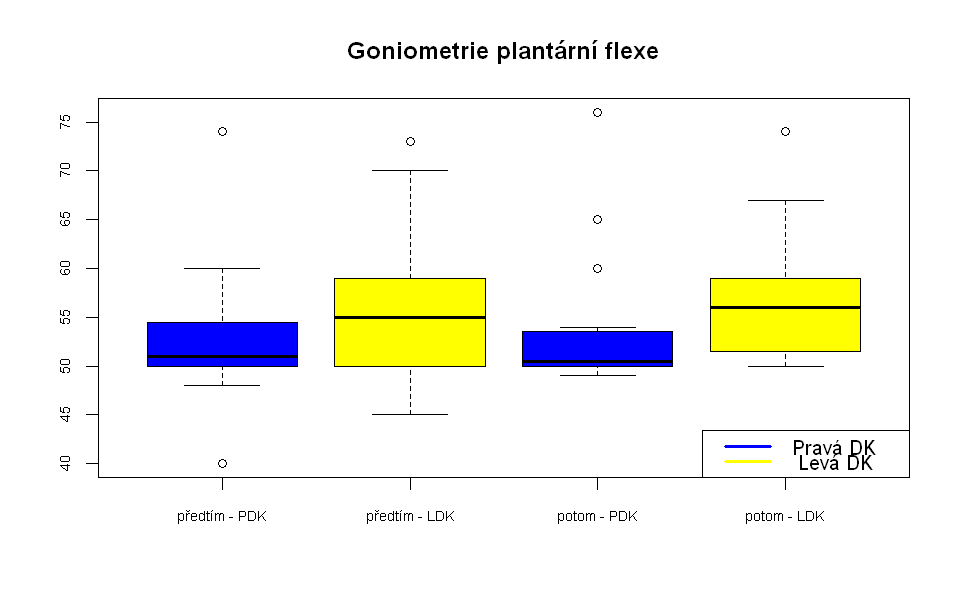

In [144]:
options(repr.plot.width=8, repr.plot.height=5)
tpc <- cbind(data_pred[,c(1,2)], data_po[, c(1,2)])
barvicky <- c("blue","yellow")
popis <- c("předtím - PDK","předtím - LDK",
           "potom - PDK","potom - LDK")
boxplot(tpc, xlab = "", ylab = "", col = barvicky, names = popis, par(cex.axis=0.7))
title("Goniometrie plantární flexe")
legend("bottomright", c("Pravá DK", " Levá DK"),
       col=c("blue", "yellow"), lwd=3)

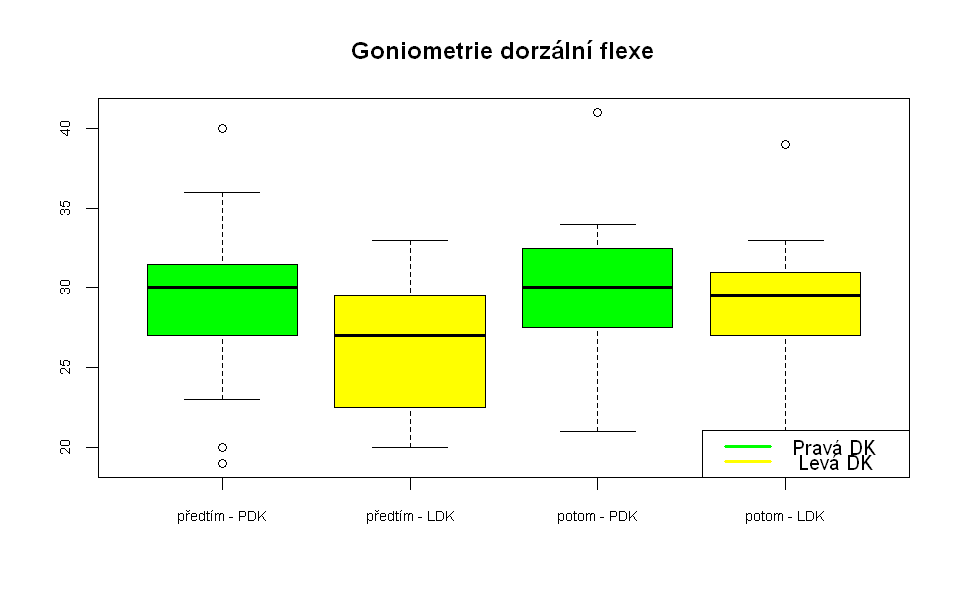

In [143]:
options(repr.plot.width=8, repr.plot.height=5)
tpc <- cbind(data_pred[,c(3,4)], data_po[, c(3,4)])
barvicky <- c("green","yellow")
popis <- c("předtím - PDK","předtím - LDK",
           "potom - PDK","potom - LDK")
boxplot(tpc, xlab = "", ylab = "", col = barvicky, names = popis, par(cex.axis=0.7))
title("Goniometrie dorzální flexe")
legend("bottomright", c("Pravá DK", " Levá DK"),
       col=c("green", "yellow"), lwd=3)

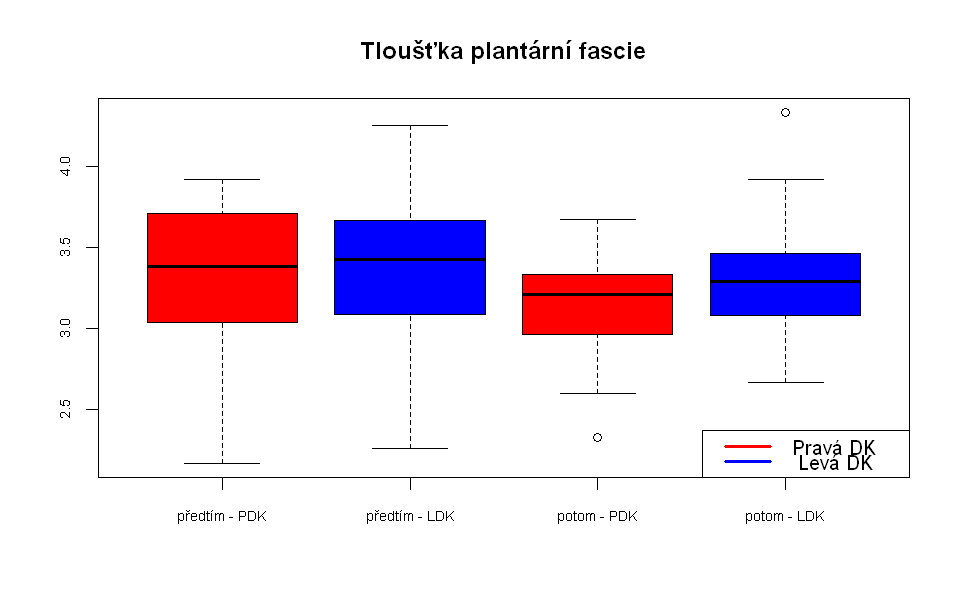

In [134]:
options(repr.plot.width=8, repr.plot.height=5)
tpc <- cbind(data_pred[,c(5,6)], data_po[, c(5,6)])
barvicky <- c("red","blue")
popis <- c("předtím - PDK","předtím - LDK",
           "potom - PDK","potom - LDK")
boxplot(tpc, xlab = "", ylab = "", col = barvicky, names = popis, par(cex.axis=0.7))
title("Tloušťka plantární fascie")
legend("bottomright", c("Pravá DK", " Levá DK"),
       col=c("red", "blue"), lwd=3)

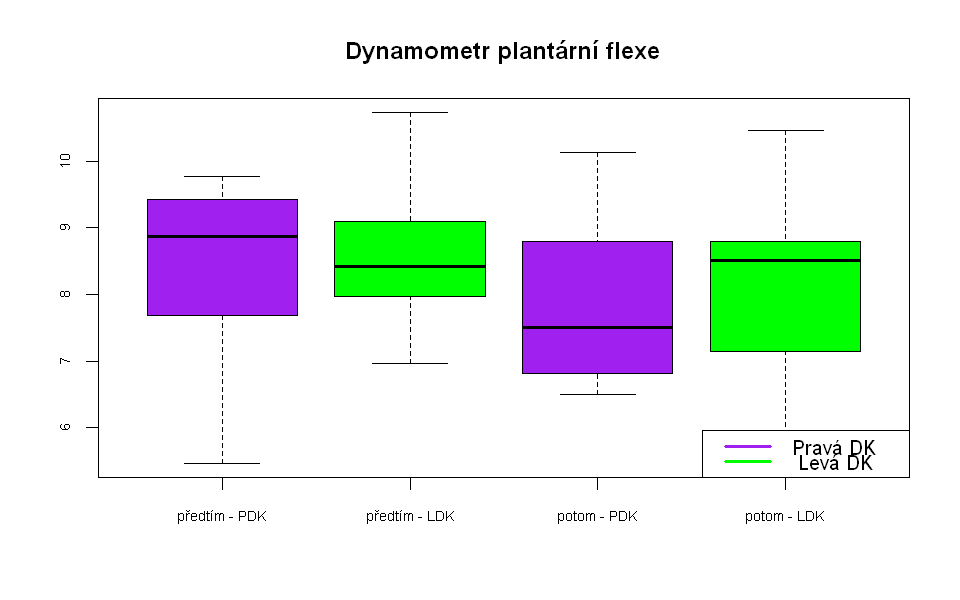

In [137]:
options(repr.plot.width=8, repr.plot.height=5)
tpc <- cbind(data_pred[,c(7,8)], data_po[, c(7,8)])
barvicky <- c("purple","green")
popis <- c("předtím - PDK","předtím - LDK",
           "potom - PDK","potom - LDK")
boxplot(tpc, xlab = "", ylab = "", col = barvicky, names = popis, par(cex.axis=0.7))
title("Dynamometr plantární flexe")
legend("bottomright", c("Pravá DK", " Levá DK"),
       col=barvicky, lwd=3)

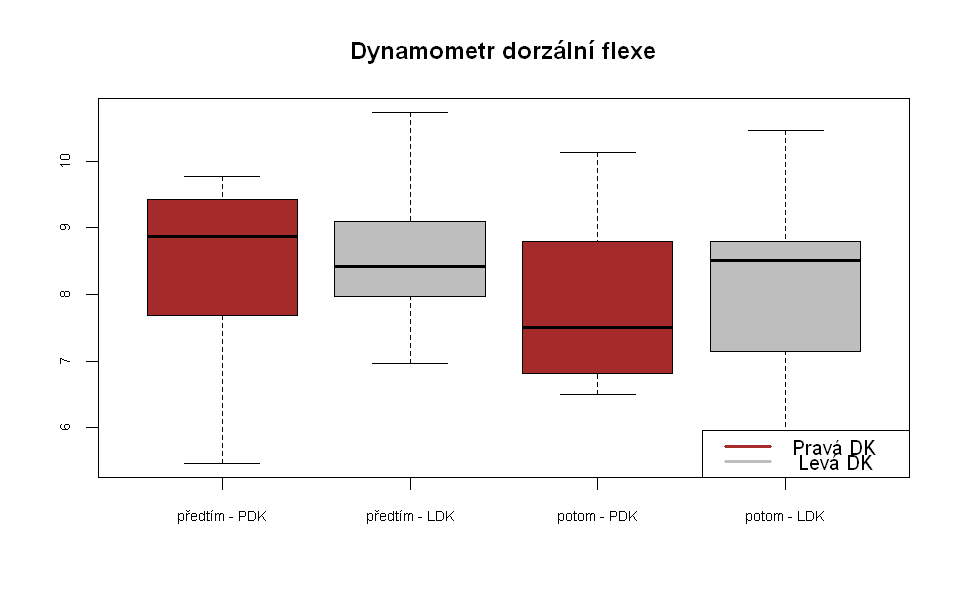

In [146]:
options(repr.plot.width=8, repr.plot.height=5)
tpc <- cbind(data_pred[,c(7,8)], data_po[, c(7,8)])
barvicky <- c("brown","grey")
popis <- c("předtím - PDK","předtím - LDK",
           "potom - PDK","potom - LDK")
boxplot(tpc, xlab = "", ylab = "", col = barvicky, names = popis, par(cex.axis=0.7))
title("Dynamometr dorzální flexe")
legend("bottomright", c("Pravá DK", " Levá DK"),
       col=barvicky, lwd=3)

## Histogramy

In [157]:
data_rozdil <- data_pred - data_po
data_rozdil %>% head()

gonio plantární flexe P,gonio plantární flexe L,gonio dorsání flexe P,gonio dorsání flexe L,tloušťka plantární fascie (podélné) P,tloušťka plantární fascie (podélné) L,dynamometr plantární flexe P,dynamometr plantární flexe L,dynamometr dorsální flexe P,dynamometr dorsální flexe L
2,4,3,-1,0.74,1.01,0.46666667,2.4333333,0.9000000,2.333333
5,2,-3,-8,-0.09,-0.40,0.50000000,-0.5000000,-2.1000000,0.200000
0,-4,-3,1,-0.25,-0.34,1.93333333,2.8666667,0.6333333,3.866667
0,-5,0,0,-0.25,0.00,2.30000000,-0.6666667,3.2666667,2.933333
-20,-11,-3,-2,0.41,0.08,0.06666667,0.2333333,-1.2000000,-0.900000
0,1,-2,-4,0.58,0.18,2.03333333,0.3666667,1.7000000,1.333333


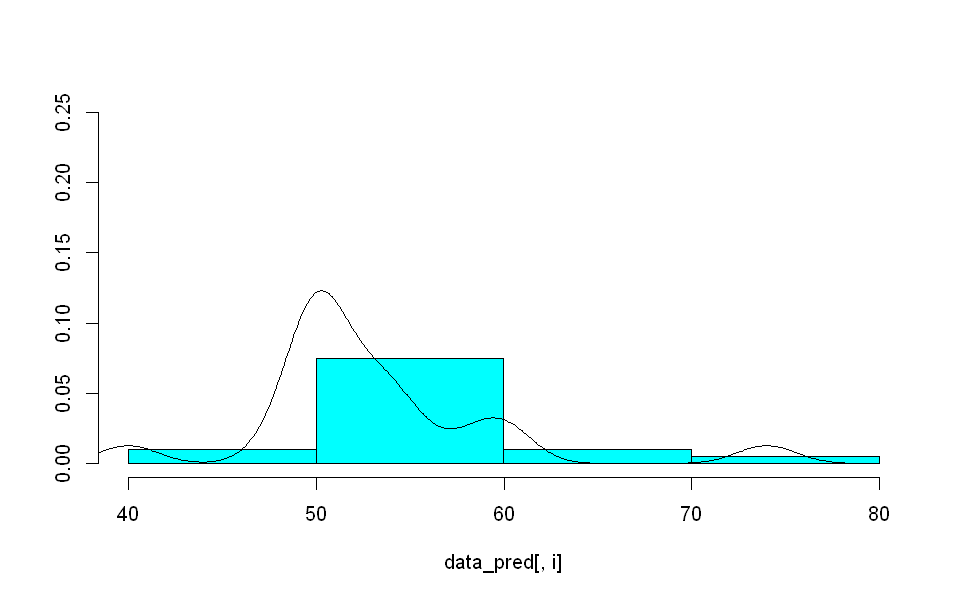

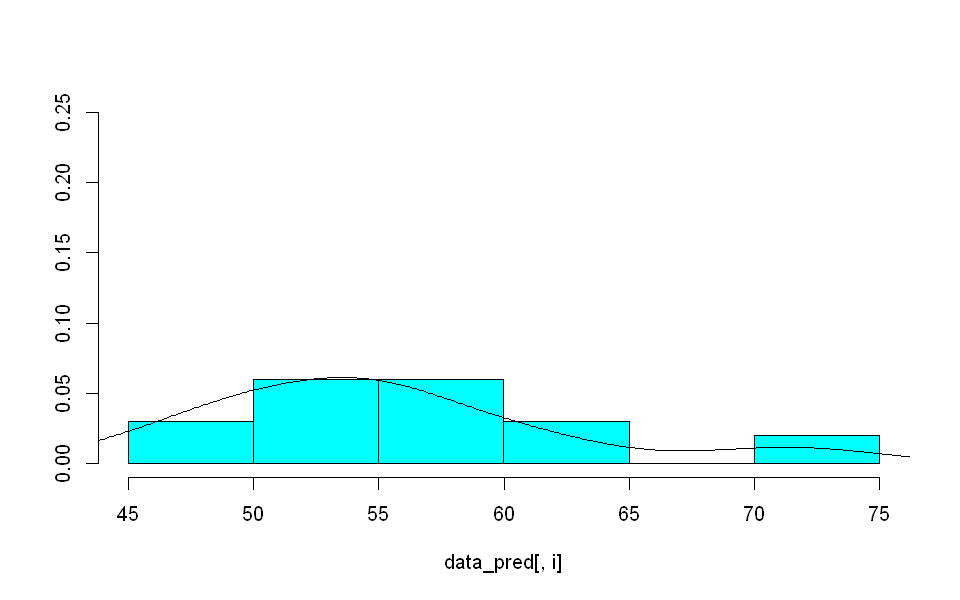

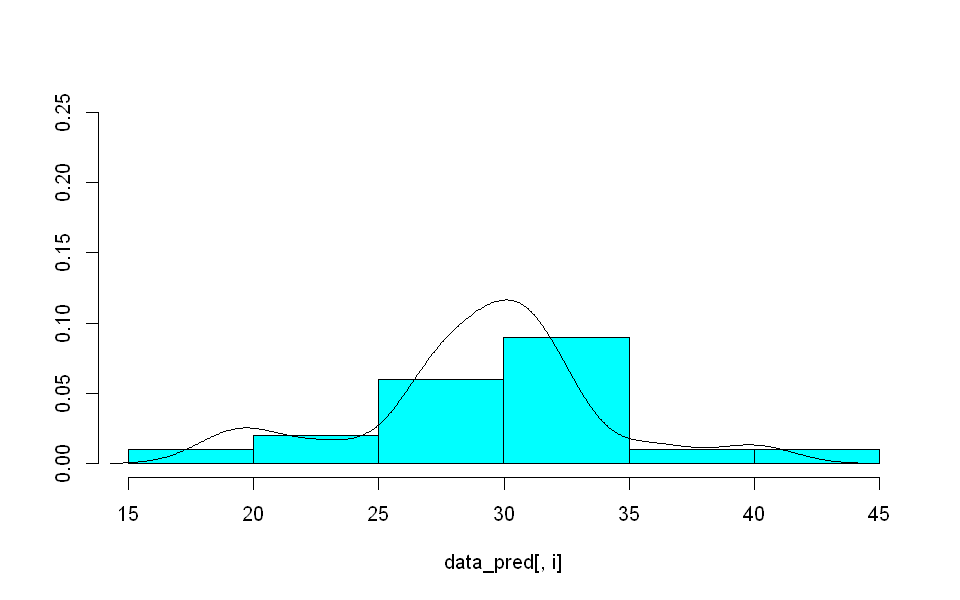

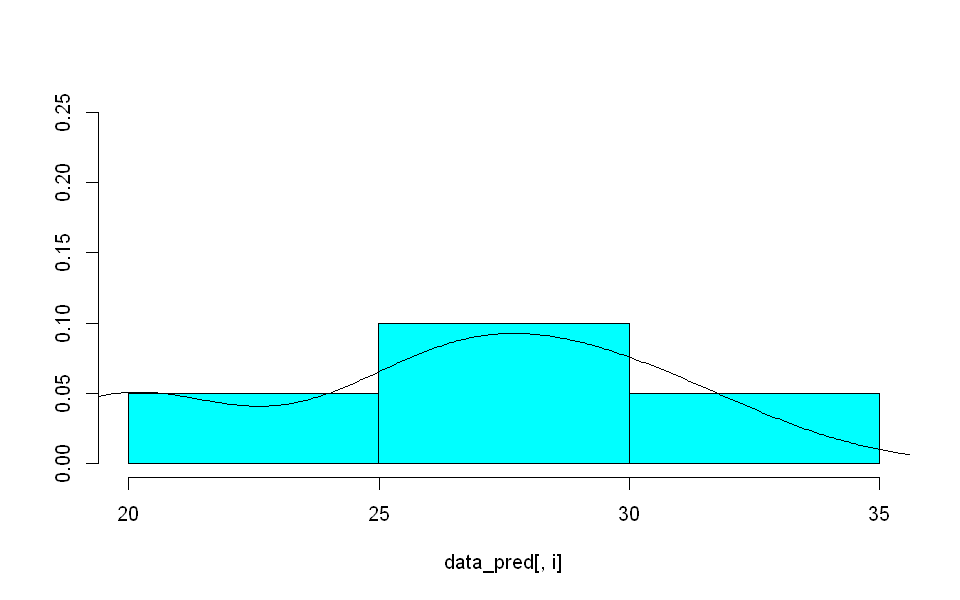

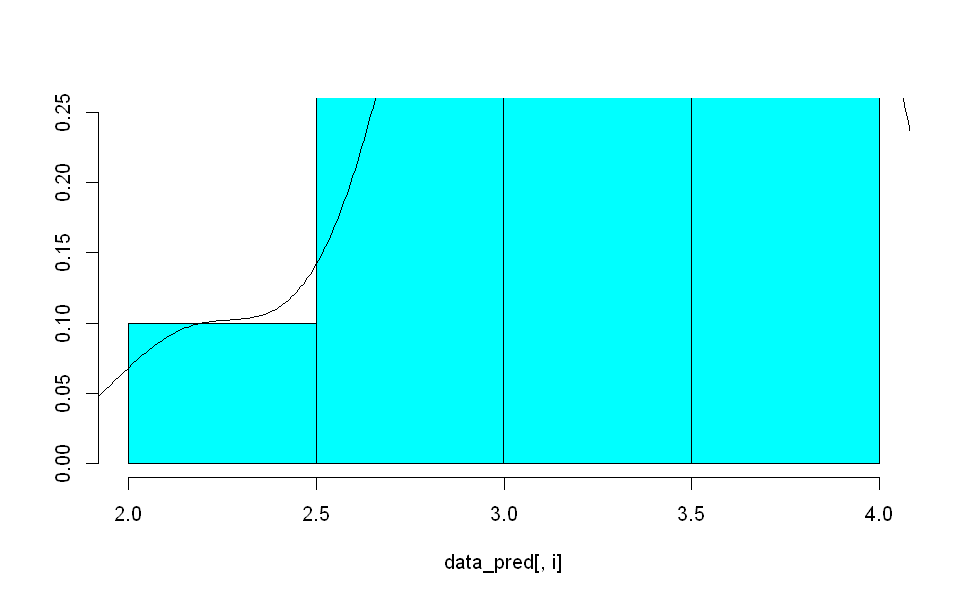

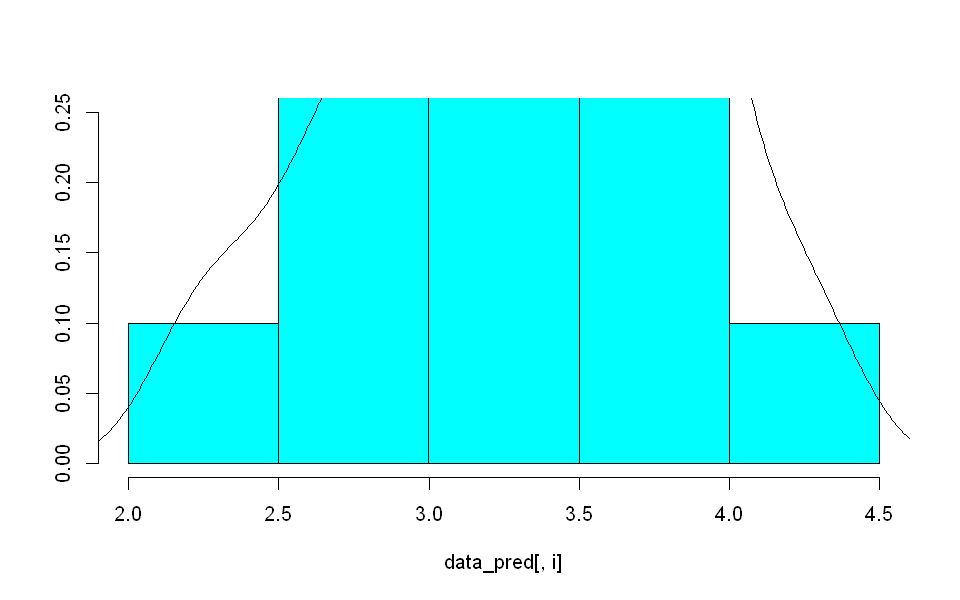

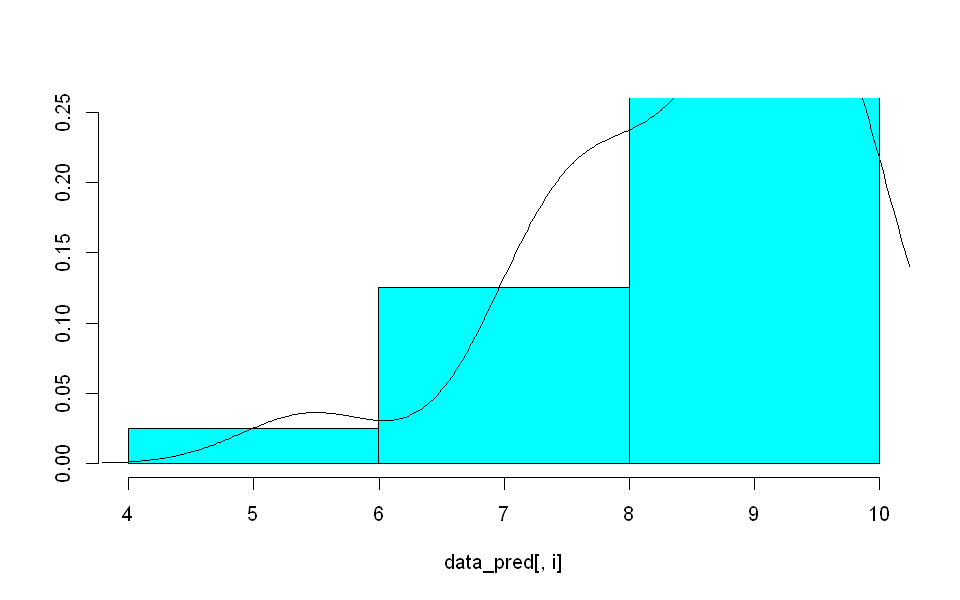

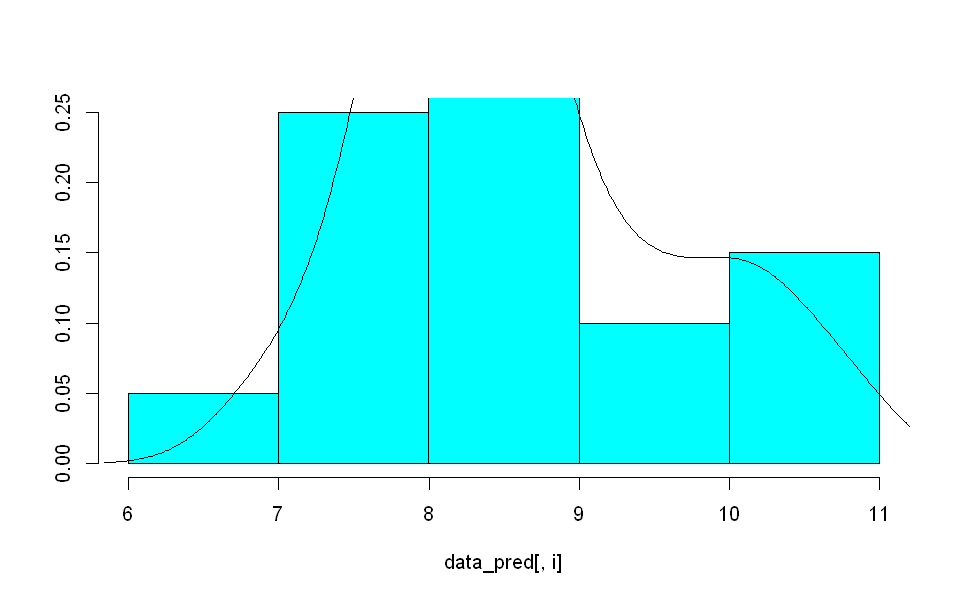

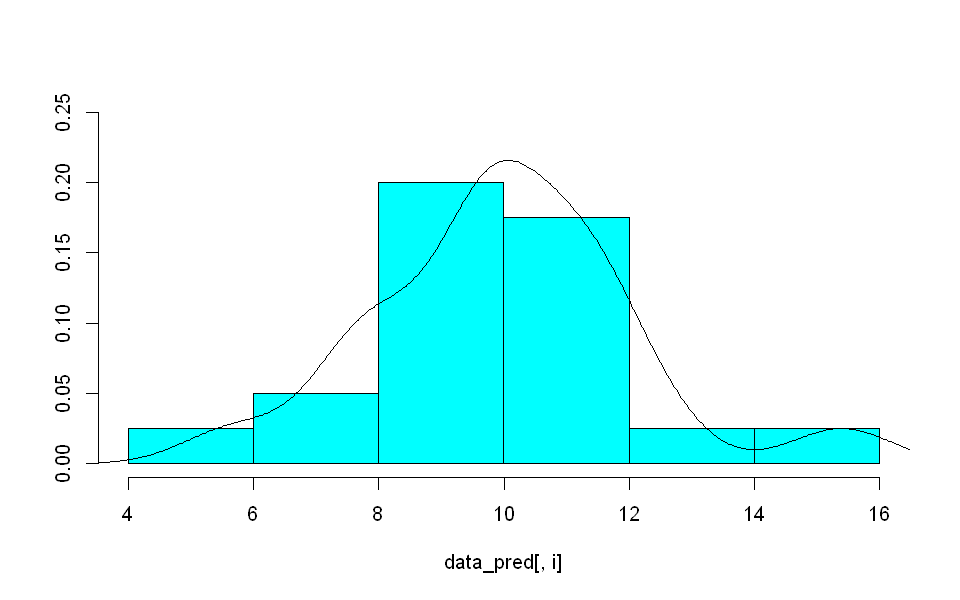

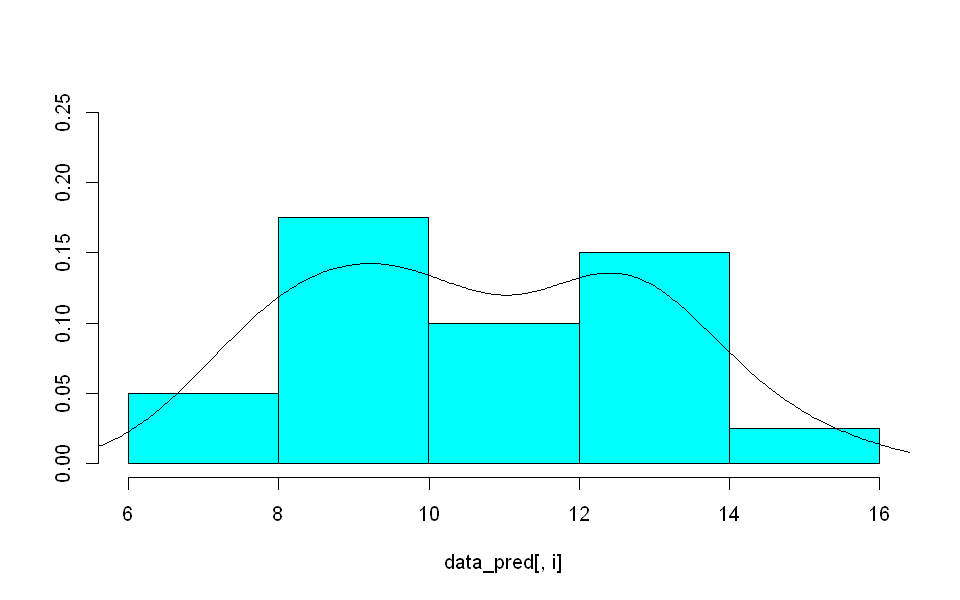

In [158]:
for (i in 1:ncol(data_rozdil)){
    MASS::truehist(data_pred[,i], ylim = c(0,0.25))
    lines(density(data_pred[,i]))
}

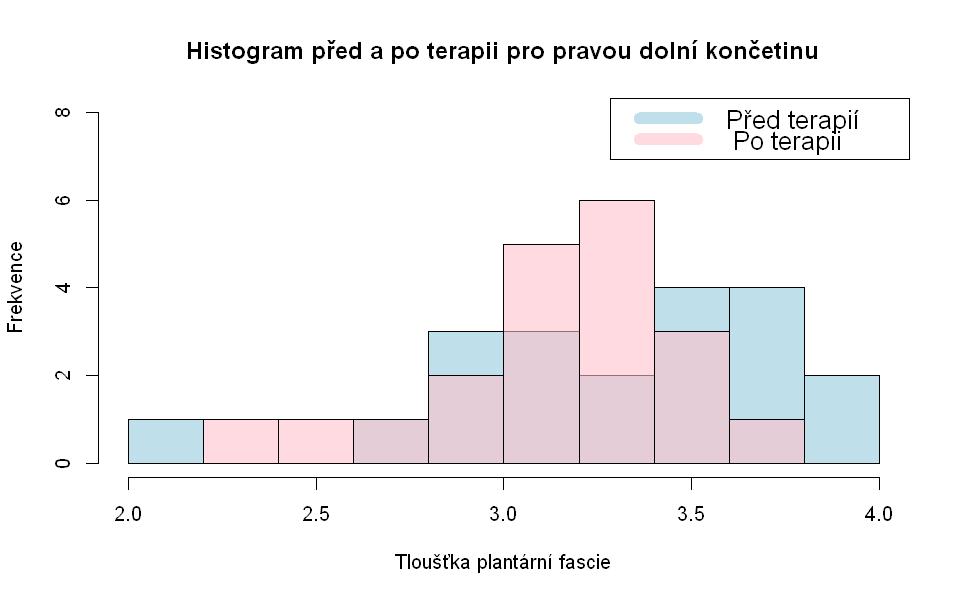

In [215]:
#breaks
n <- 8
posloupnost <- pretty(2:4, n = n, min.n = n) # Make a neat vector for the breakpoints

#barvicky
modra <- rgb(173,216,230, max = 255, alpha = 200, names = "lt.blue")
ruzova <- rgb(255,192,203, max = 255, alpha = 150, names = "lt.pink")



#histogramy
hist_pred <- hist(data_pred[,5], breaks = posloupnost, plot = 0)
hist_po <- hist(data_po[,5], breaks = posloupnost, plot = 0)
plot(hist_pred, freq = TRUE, xlim = c(2,4), ylim = c(0,8),
     main = "Histogram před a po terapii pro pravou dolní končetinu",
     xlab = "Tloušťka plantární fascie", ylab = "Frekvence", col = modra)
plot(hist_po, freq = TRUE, xlim = c(0,4), ylim = c(0,2), col = ruzova, add = TRUE)
op <- par(cex = 1)
legend("topright", legend = c("Před terapií"," Po terapii"), col = c(modra, ruzova), lwd = 10, par(cex=0.7), cex = 1.3)

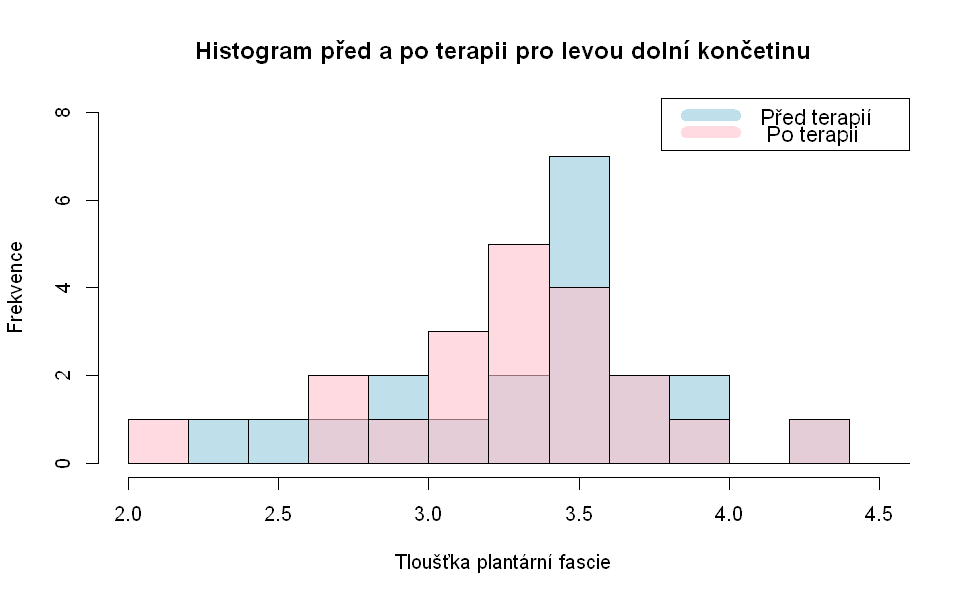

In [238]:
#breaks
n <- 19
posloupnost <- pretty(2:5, n = n) # Make a neat vector for the breakpoints

#barvicky
modra <- rgb(173,216,230, max = 255, alpha = 200, names = "lt.blue")
ruzova <- rgb(255,192,203, max = 255, alpha = 150, names = "lt.pink")



#histogramy
hist_pred <- hist(data_pred[,6], breaks = posloupnost, plot = 0)
hist_po <- hist(data_po[,6], breaks = posloupnost, plot = 0)
plot(hist_pred, freq = TRUE, xlim = c(2,4.5), ylim = c(0,8),
     main = "Histogram před a po terapii pro levou dolní končetinu",
     xlab = "Tloušťka plantární fascie", ylab = "Frekvence", col = modra)
plot(hist_po, freq = TRUE, xlim = c(0,4), ylim = c(0,2), col = ruzova, add = TRUE)
op <- par(cex = 1)
legend("topright", legend = c("Před terapií"," Po terapii"), col = c(modra, ruzova), lwd = 10, par(cex=0.7), cex = 1.1)

In [239]:
summary(data_pred[,6])
summary(data_po[,6])
posloupnost

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.260   3.127   3.425   3.366   3.623   4.250 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.170   3.115   3.290   3.293   3.440   4.330 

[1] 2.0 2.2 2.4 2.6 2.8 3.0 3.2 3.4 3.6 3.8 4.0 4.2 4.4 4.6 4.8 5.0

In [80]:
data_pred %>% glimpse()

Observations: 20
Variables: 10
$ `gonio plantární flexe P`               <dbl> 54, 55, 50, 50, 40, 50, 52,...
$ `gonio plantární flexe L`               <dbl> 55, 60, 50, 45, 46, 53, 55,...
$ `gonio dorsání flexe P`                 <dbl> 32, 30, 27, 30, 31, 30, 36,...
$ `gonio dorsání flexe L`                 <dbl> 29, 25, 28, 30, 27, 25, 33,...
$ `tloušťka plantární fascie (podélné) P` <dbl> 3.34, 2.92, 3.08, 2.67, 3.3...
$ `tloušťka plantární fascie (podélné) L` <dbl> 3.76, 2.58, 3.42, 3.17, 2.7...
$ `dynamometr plantární flexe P`          <dbl> 8.500000, 7.200000, 8.80000...
$ `dynamometr plantární flexe L`          <dbl> 8.500000, 8.233333, 10.1000...
$ `dynamometr dorsální flexe P`           <dbl> 9.833333, 8.133333, 9.53333...
$ `dynamometr dorsální flexe L`           <dbl> 11.566667, 9.833333, 12.666...


In [233]:
?pretty